In [12]:
import numpy as np
import random
from envs.gridWorldV2 import GridworldV2Env
from value_function_utils import visualize_grid_action_values

In [3]:
def sarsa(env, max_episodes):
    grid_action_values = np.zeros((len(env.distinct_states), env.action_space.n))
    grid_action_values[env.goal_state] = 1
    grid_action_values[env.bomb_state] = -1
    
    gamma = 0.99 # discounting factor
    alpha = 0.01 # learning rate
    # q: state-action-value function
    q = grid_action_values
    
    for episode in range(max_episodes):
        step_num = 1
        done = False
        state = env.reset()
        action = greedy_policy(q[state], 1)
        while not done:
            next_state, reward, done = env.step(action)
            step_num += 1
            decayed_epsilon = gamma ** step_num
            # Doesn't have to be gamma
            next_action = greedy_policy(q[next_state], decayed_epsilon)
            q[state][action] += alpha * (
            reward + gamma * q[next_state][next_action] - q[state][action]
            )
            state = next_state
            action = next_action
    visualize_grid_action_values(grid_action_values)

In [4]:
def greedy_policy(q_values, epsilon):
    """Epsilon-greedy policy """
    if random.random() >= epsilon:
        return np.argmax(q_values)
    else:
        return random.randint(0, 3)

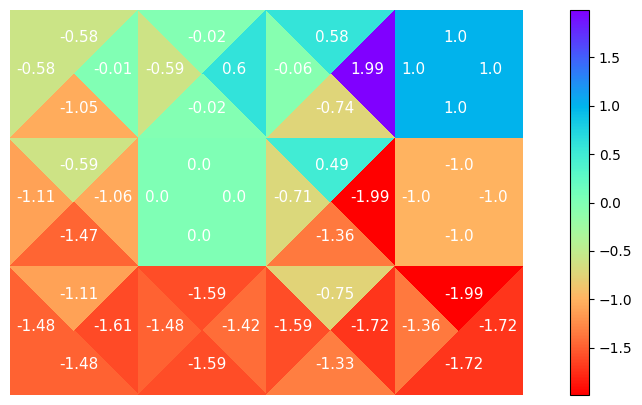

In [14]:
if __name__ == "__main__":
    max_episodes = 100000
    env = GridworldV2Env(step_cost=-0.1,max_ep_length=30)
    sarsa(env, max_episodes)